[EDA TODO:](https://docs.google.com/document/d/1N711UXfrLI09kV_NdWNkG6TK677rAHMHuH_gMttfxRs/edit)
- MOST COMMON TERMS
   - overall
   - By brand
   - By Contact type (HCP vs Patient) – assuming CONTACT_TYPE US Consumer = HCP
   - IVR Reason
   - By call type – transfer vs regular
   - By call duration (short, long calls – what are they about?)
- MOST COMMON MEDICAL TERMS
   - overall
   - By brand
   - By Contact type (HCP vs Patient) – assuming CONTACT_TYPE US Consumer = HCP
   - IVR Reason
   - By call type – transfer vs regular
   - By call duration (short, long calls – what are they about?)
- SENTIMENT
   - overall
   - By brand
   - By Contact type (HCP vs Patient) – assuming CONTACT_TYPE US Consumer = HCP
   - IVR Reason
   - By call type – transfer vs regular
   - By call duration (short, long calls – what are they about?)

In [870]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


df = {'ts_md': pd.read_csv('df/ts_md.csv'),
      'md_ent': pd.read_csv('df/md_ent.csv'),
      'ts_ent': pd.read_csv('df/ts_ent.csv'),
      'ts_sent': pd.read_csv('df/ts_sent.csv')
     }

# Create sentiment categories
# n.b. pd.qcut vs. pd.cut!
df['ts_sent']['magn_cat'] = pd.qcut(df['ts_sent']['magnitude'], 3, labels = ['l', 'm', 'h']).astype(str)
df['ts_sent']['sent_cat'] = pd.cut(df['ts_sent']['score'], [-1, -0.1, 0.1, 1], 
                                        labels = ['-', 'n', '+']).astype(str)
sent_type = {'l-': 'maybe negative', 'ln': 'neutral', 'l+': 'maybe positive',
             'm-': 'negative', 'mn': 'mixed', 'm+': 'positive',
             'h-': 'very negative', 'hn': 'very mixed', 'h+': 'very positive'}
df['ts_sent']['sent_type'] = [sent_type[x] for x in 
                              df['ts_sent']['magn_cat'] + df['ts_sent']['sent_cat']]

In [871]:
df['ts_sent']

,call_id,magnitude,score,sentences,magn_cat,sent_cat,sent_type
0,200104928812,13.1,0.1,[{'text': {'content': 'Thank you for calling t...,l,n,neutral
1,224537826923,68.4,0.1,[{'text': {'content': 'Thank you for calling t...,h,n,very mixed
2,200036105174,13.6,0.1,[{'text': {'content': 'Thank you for calling t...,l,n,neutral
3,200035905791,11.7,0.2,[{'text': {'content': 'Thank you for calling t...,l,+,maybe positive
4,200104595841,10.9,0.2,[{'text': {'content': 'Thank you for calling t...,l,+,maybe positive
...,...,...,...,...,...,...,...
4122,224537897080,17.0,0.2,"[{'text': {'content': '.', 'beginOffset': 0}, ...",m,+,positive
4123,224407824649,30.2,-0.1,"[{'text': {'content': 'Hello.', 'beginOffset':...",m,-,negative
4124,199533113934,9.3,0.2,[{'text': {'content': 'Thank you for calling t...,l,+,maybe positive
4125,199816137034,25.4,0.1,"[{'text': {'content': 'Like does it a lot.', '...",m,n,mixed


In [872]:
df['ts_md']

,call_id,call_len_sec,transcript,OWNER_NAME_CURRENT,CONTACT_TYPE,CASE_NUMBER,CREATED_DATE_TIME,COMPANY,INCONTACT_COMPANY,IVR_REASON,...,PRODUCT_NAME,CASE_TIER_1_GLOBAL,CASE_TIER_2_US,CASE_TIER_3_US,DESCRIPTION,SUBJECT,weekday,transfer,_merge,md_desc
0,199471033785,390,Thank you for calling the new Colorado support...,Carolyn Fleck,US Consumer,1366726,2022-05-02 08:22:09,NaN,GSK,Nucala Inbound Call,...,NUCALA FRANCHISE,General Enquiry,GRC-Gateway Transfer,Returning Gateway Call,Returning call.,Nucala Gateway,0,True,both,Nucala Gateway. Returning call.
1,199471036295,30,. The person you have called does not subscrib...,Terence Bethea,Patient,1366729,2022-05-02 08:30:44,NaN,GSK,Role Menu Max Errors,...,NaN,General Enquiry,NaN,NaN,NaN,NaN,0,False,both,NaN
2,199471038090,840,. Thank you for calling no response there . My...,Vernessa Selvy,US Consumer,1366732,2022-05-02 08:34:21,NaN,GSK,Pricing_Question,...,TRELEGY,General Enquiry,GRC Transfer,GRC Product Team,Caller need assistance with using product.\nTr...,Product Team,0,True,both,Product Team. Caller need assistance with usin...
3,199471038937,1500,. Thank you for calling the response center . ...,Marilynn Adams,US Consumer,1366735,2022-05-02 08:38:48,NaN,GSK,Quality Complaint,...,ADVAIR DISKUS,Product Quality Complaints,PQC completed with related AE,Replaced by SC,PQC filed. cc notification: 201203683,PQC 201203683,0,False,both,PQC 201203683. PQC filed. cc notification: 201...
4,199471039719,30,Okay . The person you have called does not sub...,Jessica Harris,Patient,1366737,2022-05-02 08:40:19,NaN,GSK,Coupon Max Errors,...,NaN,General Enquiry,NaN,NaN,NaN,NaN,0,False,both,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,224538033075,30,Okay . The person you have called does not sub...,Laurie Varner,Patient,1391857,2022-05-27 17:16:13,NaN,GSK,Direct Dial to Product Skill,...,NaN,General Enquiry,NaN,NaN,NaN,NaN,4,False,both,NaN
4124,224538033855,480,Thank you for calling and responsible . My nam...,Raquel Mitchell,Patient,1391858,2022-05-27 17:17:39,NaN,GSK,GSK Source,...,NaN,General Enquiry,GRC Transfer,GSK Employee,The caller called in requesting to speak with ...,Simple Transfer,4,True,both,Simple Transfer. The caller called in requesti...
4125,224538033914,420,Thank you for calling the response center . My...,Matthew Jo,Patient,1391859,2022-05-27 17:17:43,NaN,GSK,Direct Dial to Product Skill,...,HAVRIX ADULT,General Enquiry,GRC Transfer,NaN,Rep to transfer HCP wanting to return Havrix t...,Potential PSC Transfer,4,True,both,Potential PSC Transfer. Rep to transfer HCP wa...
4126,224538037167,390,. Thank you for calling the new Colorado suppo...,Carolyn Fleck,US Consumer,1391863,2022-05-27 17:23:17,NaN,GSK,Nucala Inbound Call,...,NUCALA FRANCHISE,General Enquiry,GRC-Gateway Transfer,Refill Questions,Patient calling to see if prescription has bee...,Prescription status,4,True,both,Prescription status. Patient calling to see if...


In [873]:
df['md_ent']['type'].value_counts()

OTHER            12949
PERSON            4927
ORGANIZATION      2957
NUMBER            1285
CONSUMER_GOOD     1169
LOCATION           620
EVENT              427
WORK_OF_ART        257
DATE                64
ADDRESS             34
PHONE_NUMBER        20
PRICE                3
Name: type, dtype: int64

In [874]:
df['md_ent'][df['md_ent']['type'] == 'OTHER']['name'].value_counts()[:20]

assistance                    474
content                       283
call                          252
Transfer                      249
information                   224
Resolution                    217
number                        207
samples                       168
phone number                  163
pharmacy                      152
TRANSFER                      143
Patient Assistance Program    129
inhaler                       122
questions                     107
coupon                        102
Shingrix                       96
vaccine                        93
case                           90
dose                           90
transfer                       82
Name: name, dtype: int64

In [875]:
df['ts_md'].CONTACT_TYPE.value_counts()

US Consumer            1913
Patient                1270
US Professional         901
US Internal Contact      33
Name: CONTACT_TYPE, dtype: int64

# Documentation
- Entity: https://cloud.google.com/natural-language/docs/reference/rest/v1/Entity#Type
- Sentiment: https://cloud.google.com/natural-language/docs/basics#interpreting_sentiment_analysis_values

In [876]:
df['ts_sent']['score'].describe()

count    4127.000000
mean        0.049624
std         0.102225
min        -0.700000
25%         0.000000
50%         0.000000
75%         0.100000
max         0.800000
Name: score, dtype: float64

<AxesSubplot:xlabel='score', ylabel='magnitude'>

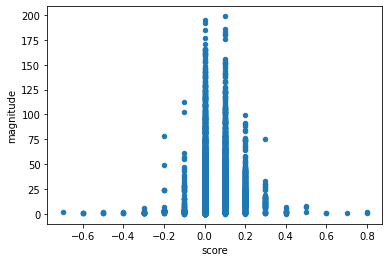

In [877]:
df['ts_sent'].plot.scatter('score', 'magnitude')

| Score, Magnitude:  | Low  | Medium | High |
|---|---|---|---|
| Negative | Maybe negative | Negative | Very negative |
| Zero | Neutral | Mixed | Very mixed |
| Positive | Maybe positive | Positive | Very positive |

| Score, Magnitude:  | Low  | Medium | High | Total |
|---|---|---|---|---|
| Negative | 262 (maybe negative) | 20 (negative) | 14 (very negative) | **296** | 
| Zero | 908 (neutral) | 1176 (mixed) | 1267 (very mixed) | **3351** | 
| Positive | 216 (maybe positive) | 170 (positive) | 94 (very positive) | **480** | 
| **Total** | **1386** | **1375** | **1366** | **4127** | 

In [878]:
df['ts_sent'].loc[(df['ts_sent']['sent_type'] == 'very negative'), 'call_id']

233     199601299807
608     199471471516
1543    199471478842
1879    199886171216
1948    200105456034
1970    224408204254
2228    199816410945
2802    199886237591
2842    224334174379
3110    199885716612
3487    199955867331
3554    199741922373
3614    199885559661
3971    200105336801
Name: call_id, dtype: int64

In [879]:
# mark Q: months and 
# wordcloud for negative sentiment calls (so we can correlate it to https://docs.google.com/presentation/d/1gWxoouBanQOkFCfNGvZBFyooH2XEkwsZDp3eXznamKI/)
# align this with deck (do it by word clouds, topic analysis, extracting '$' entity etc.)

In [880]:
# sentiment between categories (slide 7):
#    https://docs.google.com/presentation/d/1gWxoouBanQOkFCfNGvZBFyooH2XEkwsZDp3eXznamKI/edit#slide=id.gf4f734b47b_0_19
# emotional response: "here's what your customers are upset about," "here's what they are happy about :)"


In [881]:
#for sent_type_ in ['very negative']:
#call_ids = df['ts_sent'].loc[(df['ts_sent']['sent_type'] == sent_type_), 'call_id']
#print(f'\n{sent_type_}:')
#print(df['ts_md'].loc[df['ts_md']['call_id'].isin(call_ids), 'transcript'].values)

In [882]:
# Merge ts_sent and ts_md on call_id
ts_md_sent=df['ts_sent'].merge(df['ts_md'],on="call_id")

# Check merge
print(f"{df['ts_sent']['call_id'].nunique()} calls before merge, {ts_md_sent['call_id'].nunique()} calls after")

4127 calls before merge, 4127 calls after


In [883]:
# Drop calls under 30 seconds
ts_md_sent = ts_md_sent[ts_md_sent['call_len_sec'] > 30] 

# create percentage of call volume column
ts_md_sent['percent_of_calls'] = (ts_md_sent['call_id'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
ts_md_sent['percent_of_time'] = (ts_md_sent['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
ts_md_sent['difference'] = ts_md_sent['percent_of_calls']-ts_md_sent['percent_of_time']

# create call length hours column
ts_md_sent['call_len_hours'] = ts_md_sent['call_len_sec']/3600

# create avg call length
ts_md_sent['call_len_avg_min'] = ts_md_sent['call_len_sec']/ts_md_sent['call_id']/60

ts_md_sent.shape[0]

3768

In [884]:
ts_md_sent.describe()

,call_id,magnitude,score,call_len_sec,CASE_NUMBER,COMPANY,weekday,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
count,3.768000e+03,3768.000000,3768.000000,3768.000000,3.768000e+03,0.0,3768.000000,3.768000e+03,3768.000000,3.768000e+03,3768.000000,3.768000e+03
mean,2.061369e+11,33.623859,0.061120,556.576433,1.378575e+06,NaN,1.831210,5.470724e+09,0.026539,5.470724e+09,0.154605,4.512260e-11
std,1.073344e+10,29.763216,0.076965,477.626764,7.329487e+03,NaN,1.435883,2.848577e+08,0.022775,2.848577e+08,0.132674,3.886354e-11
min,1.994710e+11,0.000000,-0.300000,60.000000,1.366726e+06,NaN,0.000000,5.293817e+09,0.002861,5.293817e+09,0.016667,4.453589e-12
25%,1.997419e+11,14.100000,0.000000,240.000000,1.372324e+06,NaN,1.000000,5.301006e+09,0.011444,5.301006e+09,0.066667,2.001137e-11
50%,1.999560e+11,23.300000,0.100000,390.000000,1.378214e+06,NaN,2.000000,5.306689e+09,0.018596,5.306689e+09,0.108333,3.248294e-11
75%,2.243338e+11,42.900000,0.100000,720.000000,1.385142e+06,NaN,3.000000,5.953656e+09,0.034332,5.953656e+09,0.200000,5.763462e-11
max,2.245381e+11,198.800000,0.500000,3900.000000,1.391871e+06,NaN,4.000000,5.959078e+09,0.185964,5.959078e+09,1.083333,3.256503e-10


In [885]:
# Bucketing vars
import re
ts_md_sent['subject_cat']="Other"
ts_md_sent.loc[ts_md_sent['SUBJECT'].str.contains('PAP|Patient Assistance', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "PAP"
ts_md_sent.loc[ts_md_sent['SUBJECT'].str.contains('sample', na=False,flags=re.IGNORECASE, regex=True), "subject_cat"] = "Sample"
ts_md_sent.loc[ts_md_sent['SUBJECT'].str.contains('PI', na=False, flags=re.IGNORECASE, regex=True),"subject_cat"] = "PI"
ts_md_sent.loc[ts_md_sent['SUBJECT'].str.contains('pqc|complain', na=False, flags=re.IGNORECASE, regex=True),"subject_cat"] = "Complaint"
ts_md_sent.loc[ts_md_sent['SUBJECT'].str.contains('saving|coupon|cost|fina', na=False, flags=re.IGNORECASE, regex=True),"subject_cat"] = "Coupon"
ts_md_sent.loc[ts_md_sent['SUBJECT'].str.contains('ae|side effect', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "Side Effects"
ts_md_sent['transfer2']="False"
ts_md_sent.loc[ts_md_sent['transcript'].str.contains('transfer', na=False, flags=re.IGNORECASE, regex=True),"transfer2"] = "True"

#voicemail
ts_md_sent.loc[ts_md_sent['transcript'].str.contains('person you have called|record your message', na=False, flags=re.IGNORECASE, regex=True),"voicemail"] = "Voicemail"



In [886]:
###VOICEMAIL

# group by product name, get call volume by product name
product2 = ts_md_sent.groupby('voicemail').agg({'call_id': 'nunique','call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'PRODUCT_NAME': 'PRODUCT_NAME', 'call_id' : 'call_volume'})

# create percentage of call volume column
product2['percent_of_calls'] = (product2['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
product2['percent_of_time'] = (product2['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
product2['difference'] = product2['percent_of_calls']-product2['percent_of_time']

# create call length hours column
product2['call_len_hours'] = product2['call_len_sec']/3600

# create avg call length
product2['call_len_avg_min'] = product2['call_len_sec']/product2['call_volume']/60

#show
product2.head(20)

,voicemail,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Voicemail,34,3750,-0.044118,0.902335,0.178812,0.723524,1.041667,1.838235


In [887]:
# group by product name, get call volume by product name
product2 = ts_md_sent.groupby('PRODUCT_NAME').agg({'call_id': 'nunique','call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'PRODUCT_NAME': 'PRODUCT_NAME', 'call_id' : 'call_volume'})

# create percentage of call volume column
product2['percent_of_calls'] = (product2['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
product2['percent_of_time'] = (product2['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
product2['difference'] = product2['percent_of_calls']-product2['percent_of_time']

# create call length hours column
product2['call_len_hours'] = product2['call_len_sec']/3600

# create avg call length
product2['call_len_avg_min'] = product2['call_len_sec']/product2['call_volume']/60

#show
product2.head(20)

,PRODUCT_NAME,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,TRELEGY,791,461250,0.049431,20.992569,21.993820,-1.001251,128.125000,9.718710
1,BREO,354,211860,0.057910,9.394904,10.102137,-0.707233,58.850000,9.974576
2,SHINGRIX,298,196920,0.060403,7.908705,9.389752,-1.481047,54.700000,11.013423
3,NUCALA FRANCHISE,189,90570,0.086243,5.015924,4.318656,0.697267,25.158333,7.986772
4,ANORO,153,101580,0.047712,4.060510,4.843647,-0.783138,28.216667,11.065359
5,BENLYSTA FRANCHISE,106,62370,0.094340,2.813163,2.973994,-0.160830,17.325000,9.806604
6,VENTOLIN HFA,93,82590,0.045161,2.468153,3.938146,-1.469993,22.941667,14.801075
7,FLOVENT HFA,91,64020,0.056044,2.415074,3.052671,-0.637596,17.783333,11.725275
8,ADVAIR DISKUS,85,54840,0.060000,2.255839,2.614940,-0.359101,15.233333,10.752941
9,ZEJULA,50,26850,0.082000,1.326964,1.280291,0.046673,7.458333,8.950000


In [888]:
# create df of only trelegy calls
trelegy=ts_md_sent[ts_md_sent.PRODUCT_NAME=="TRELEGY"]

# check new length
print(trelegy.shape[0]) 

# group by subject and get unique counts of each subject
trelegy2 = trelegy.groupby(['subject_cat']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})

# create percentage of call volume column
trelegy2['percent_of_calls'] = (trelegy2['call_volume'] / trelegy['call_id'].nunique()) * 100

# create percentage of call time column
trelegy2['percent_of_time'] = (trelegy2['call_len_sec'] / trelegy['call_len_sec'].sum()) * 100

# create difference of %s column
trelegy2['difference'] = trelegy2['percent_of_calls']-trelegy2['percent_of_time']

# create call length hours column
trelegy2['call_len_hours'] = trelegy2['call_len_sec']/3600

# create avg call length
trelegy2['call_len_avg_min'] = trelegy2['call_len_sec']/trelegy2['call_volume']/60

#show
trelegy2.head(45)

791


,subject_cat,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Other,258,146700,0.050388,32.616941,31.804878,0.812063,40.750000,9.476744
1,PAP,230,91500,0.058696,29.077118,19.837398,9.239719,25.416667,6.630435
2,Coupon,120,68820,0.027500,15.170670,14.920325,0.250345,19.116667,9.558333
3,Complaint,63,54540,0.053968,7.964602,11.824390,-3.859788,15.150000,14.428571
4,Sample,56,30480,0.062500,7.079646,6.608130,0.471516,8.466667,9.071429
5,Side Effects,47,53670,0.038298,5.941846,11.635772,-5.693927,14.908333,19.031915
6,PI,17,15540,0.035294,2.149178,3.369106,-1.219927,4.316667,15.235294


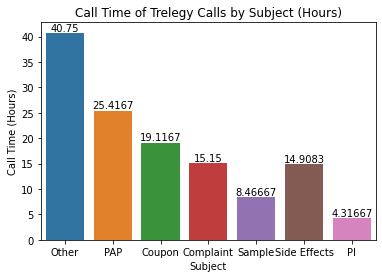

In [889]:
# Visualization of time of calls for brand by subject
trelegy_plot_time = sns.barplot(x = 'subject_cat',
            y = 'call_len_hours',
            #hue = 'call_len_hours',
            data = trelegy2.head(20))

trelegy_plot_time.set(xlabel='Subject', ylabel='Call Time (Hours)') # add x and y labels
trelegy_plot_time.set(title='Call Time of Trelegy Calls by Subject (Hours)') # add title

for container in trelegy_plot_time.containers:
    trelegy_plot_time.bar_label(container)

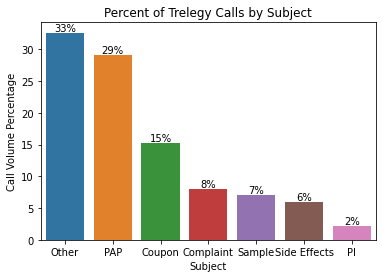

In [890]:
# Visualization of time of calls for brand by subject
trelegy_plot_percent = sns.barplot(x = 'subject_cat',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = trelegy2.head(20))

trelegy_plot_percent.set(xlabel='Subject', ylabel='Call Volume Percentage') # add x and y labels
trelegy_plot_percent.set(title='Percent of Trelegy Calls by Subject') # add title

for container in trelegy_plot_percent.containers:
    trelegy_plot_percent.bar_label(container,fmt='%.f%%')

In [891]:
# create df of only breo calls
breo=ts_md_sent[ts_md_sent.PRODUCT_NAME=="BREO"]

# check new length 
print(breo.shape[0])

# group by subject and get unique counts of each subject
breo2 = breo.groupby(['SUBJECT']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
breo2['percent_of_calls'] = (breo2['call_volume'] / breo['call_id'].nunique()) * 100

# create percentage of call time column
breo2['percent_of_time'] = (breo2['call_len_sec'] / breo['call_len_sec'].sum()) * 100

# create difference of %s column
breo2['difference'] = breo2['percent_of_calls']-breo2['percent_of_time']

# create call length hours column
breo2['call_len_hours'] = breo2['call_len_sec']/3600

# create avg call length
breo2['call_len_avg_min'] = breo2['call_len_sec']/breo2['call_volume']/60

#show
#breo2

354


In [892]:
# group by subject and get unique counts of each subject
breo22 = breo.groupby(['subject_cat']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
breo22['percent_of_calls'] = (breo22['call_volume'] / breo['call_id'].nunique()) * 100

# create percentage of call time column
breo22['percent_of_time'] = (breo22['call_len_sec'] / breo['call_len_sec'].sum()) * 100

# create difference of %s column
breo22['difference'] = breo22['percent_of_calls']-breo22['percent_of_time']

# create call length hours column
breo22['call_len_hours'] = breo22['call_len_sec']/3600

# create avg call length
breo22['call_len_avg_min'] = breo22['call_len_sec']/breo22['call_volume']/60

#show
breo22

,subject_cat,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Sample,107,55980,0.058879,30.225989,26.423110,3.802879,15.550000,8.719626
1,Other,105,56310,0.054286,29.661017,26.578873,3.082144,15.641667,8.938095
2,PAP,60,24120,0.063333,16.949153,11.384877,5.564276,6.700000,6.700000
3,Complaint,40,40080,0.057500,11.299435,18.918153,-7.618718,11.133333,16.700000
4,Coupon,19,6330,0.052632,5.367232,2.987822,2.379409,1.758333,5.552632
5,Side Effects,16,24360,0.050000,4.519774,11.498159,-6.978385,6.766667,25.375000
6,PI,7,4680,0.085714,1.977401,2.209006,-0.231605,1.300000,11.142857


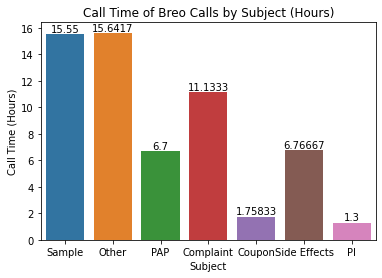

In [893]:
# Visualization of time of calls for brand by subject
breo_plot_time = sns.barplot(x = 'subject_cat',
            y = 'call_len_hours',
            #hue = 'call_len_hours',
            data = breo22.head(20))

breo_plot_time.set(xlabel='Subject', ylabel='Call Time (Hours)') # add x and y labels
breo_plot_time.set(title='Call Time of Breo Calls by Subject (Hours)') # add title

for container in breo_plot_time.containers:
    breo_plot_time.bar_label(container)

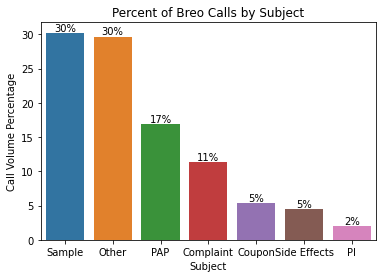

In [894]:
# Visualization of time of calls for brand by subject
breo_plot_percent = sns.barplot(x = 'subject_cat',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = breo22.head(20))

breo_plot_percent.set(xlabel='Subject', ylabel='Call Volume Percentage') # add x and y labels
breo_plot_percent.set(title='Percent of Breo Calls by Subject') # add title

for container in breo_plot_percent.containers:
    breo_plot_percent.bar_label(container,fmt='%.f%%')

In [895]:
# group by subject and get unique counts of each case2
breo3 = breo.groupby(['CASE_TIER_2_US']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
breo3['percent_of_calls'] = (breo3['call_volume'] / breo['call_id'].nunique()) * 100

# create percentage of call time column
breo3['percent_of_time'] = (breo3['call_len_sec'] / breo['call_len_sec'].sum()) * 100

# create difference of %s column
breo3['difference'] = breo3['percent_of_calls']-breo3['percent_of_time']

# create call length hours column
breo3['call_len_hours'] = breo3['call_len_sec']/3600

# create avg call length
breo3['call_len_avg_min'] = breo3['call_len_sec']/breo3['call_volume']/60

#show
breo3

,CASE_TIER_2_US,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Samples,119,65520,0.055462,33.615819,30.926083,2.689736,18.200000,9.176471
1,GRC Transfer,75,23970,0.077333,21.186441,11.314075,9.872365,6.658333,5.326667
2,GRC - Product Information,48,40380,0.054167,13.559322,19.059756,-5.500434,11.216667,14.020833
3,Patient Assistance,33,15390,0.048485,9.322034,7.264231,2.057803,4.275000,7.772727
4,Coupon,20,6840,0.050000,5.649718,3.228547,2.421170,1.900000,5.700000
5,PQC completed,13,13290,0.061538,3.672316,6.273010,-2.600694,3.691667,17.038462
6,Complaint Followup,10,5250,0.070000,2.824859,2.478052,0.346807,1.458333,8.750000
7,Education–no PQC or REPL,8,10470,0.050000,2.259887,4.941943,-2.682056,2.908333,21.812500
8,PQC completed with related AE,6,10440,0.016667,1.694915,4.927782,-3.232867,2.900000,29.000000
9,AE Initial,6,7080,0.066667,1.694915,3.341830,-1.646914,1.966667,19.666667


In [896]:
# create df of only shingrix calls
shingrix=ts_md_sent[ts_md_sent.PRODUCT_NAME=="SHINGRIX"]

# check new length 
print(shingrix.shape[0])

# group by subject and get unique counts of each subject
shingrix2 = shingrix.groupby(['subject_cat']).agg({'call_id':'nunique', 'call_len_sec':'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
shingrix2['percent_of_calls'] = (shingrix2['call_volume'] / shingrix['call_id'].nunique()) * 100

# create percentage of call time column
shingrix2['percent_of_time'] = (shingrix2['call_len_sec'] / shingrix['call_len_sec'].sum()) * 100

# create difference of %s column
shingrix2['difference'] = shingrix2['percent_of_calls']-shingrix2['percent_of_time']

# create call length hours column
shingrix2['call_len_hours'] = shingrix2['call_len_sec']/3600

# create avg call length
shingrix2['call_len_avg_min'] = shingrix2['call_len_sec']//shingrix2['call_volume']/60

#show
shingrix2

298


,subject_cat,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Other,173,101280,0.060694,58.053691,51.432054,6.621638,28.133333,9.750000
1,PAP,45,16230,0.080000,15.100671,8.241926,6.858745,4.508333,6.000000
2,Side Effects,35,38070,0.028571,11.744966,19.332724,-7.587758,10.575000,18.116667
3,PI,27,24570,0.048148,9.060403,12.477148,-3.416745,6.825000,15.166667
4,Complaint,14,14490,0.078571,4.697987,7.358318,-2.660332,4.025000,17.250000
5,Coupon,4,2280,0.125000,1.342282,1.157831,0.184451,0.633333,9.500000


In [897]:
# create df of only shingrix calls
shingrix=ts_md_sent[ts_md_sent.PRODUCT_NAME=="SHINGRIX"]

# check new length 
print(shingrix.shape[0])

# group by subject and get unique counts of each case2
shingrix3 = shingrix.groupby(['CASE_TIER_2_US']).agg({'call_id':'nunique', 'call_len_sec':'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
shingrix3['percent_of_calls'] = (shingrix3['call_volume'] / shingrix['call_id'].nunique()) * 100

# create percentage of call time column
shingrix3['percent_of_time'] = (shingrix3['call_len_sec'] / shingrix['call_len_sec'].sum()) * 100

# create difference of %s column
shingrix3['difference'] = shingrix3['percent_of_calls']-shingrix3['percent_of_time']

# create call length hours column
shingrix3['call_len_hours'] = shingrix3['call_len_sec']/3600

# create avg call length
shingrix3['call_len_avg_min'] = shingrix3['call_len_sec']//shingrix3['call_volume']/60

#show
shingrix3

298


,CASE_TIER_2_US,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,GRC - Product Information,117,101190,0.043590,39.261745,51.386350,-12.124605,28.108333,14.400000
1,GRC Transfer,90,28140,0.090000,30.201342,14.290067,15.911275,7.816667,5.200000
2,AE Initial,30,33720,0.030000,10.067114,17.123705,-7.056591,9.366667,18.733333
3,Patient Assistance,22,9780,0.081818,7.382550,4.966484,2.416066,2.716667,7.400000
4,PQC completed,11,12630,0.072727,3.691275,6.413772,-2.722497,3.508333,19.133333
5,Reason Not Found,6,1980,-0.016667,2.013423,1.005484,1.007938,0.550000,5.500000
6,"Literature, PI, or Offers",4,1590,0.100000,1.342282,0.807434,0.534847,0.441667,6.616667
7,Samples,4,1770,0.075000,1.342282,0.898842,0.443440,0.491667,7.366667
8,Education–no PQC or REPL,3,1860,0.100000,1.006711,0.944546,0.062165,0.516667,10.333333
9,Corporate Information,1,1140,0.000000,0.335570,0.578915,-0.243345,0.316667,19.000000


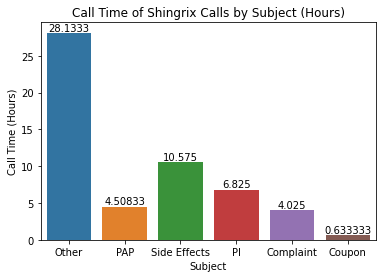

In [898]:
# Visualization of time of calls for brand by subject
shingrix_plot_time = sns.barplot(x = 'subject_cat',
            y = 'call_len_hours',
            #hue = 'call_len_hours',
            data = shingrix2.head(20))

shingrix_plot_time.set(xlabel='Subject', ylabel='Call Time (Hours)') # add x and y labels
shingrix_plot_time.set(title='Call Time of Shingrix Calls by Subject (Hours)') # add title

for container in shingrix_plot_time.containers:
    shingrix_plot_time.bar_label(container)

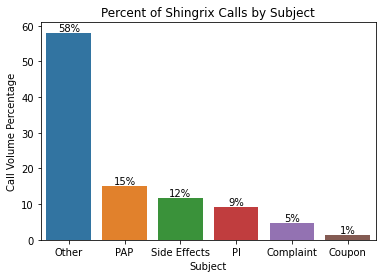

In [899]:
# Visualization of time of calls for brand by subject
shingrix_plot_percent = sns.barplot(x = 'subject_cat',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = shingrix2.head(20))

shingrix_plot_percent.set(xlabel='Subject', ylabel='Call Volume Percentage') # add x and y labels
shingrix_plot_percent.set(title='Percent of Shingrix Calls by Subject') # add title

for container in shingrix_plot_percent.containers:
    shingrix_plot_percent.bar_label(container, fmt='%.f%%')

In [900]:
# Get DF of only transfer calls
transfer=ts_md_sent[ts_md_sent["transcript"].astype(str).str.contains("transfer")]
# Get DF on only nontransfer calls
nontransfer=ts_md_sent[~ts_md_sent["transcript"].astype(str).str.contains("transfer")]

In [901]:
# bucket subject for transfer2
transfer['subject_cat']="Other"
transfer.loc[transfer['SUBJECT'].str.contains('PAP|Patient Assistance', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "PAP"
transfer.loc[transfer['SUBJECT'].str.contains('pqc|complain|malfunction', na=False,flags=re.IGNORECASE, regex=True), "subject_cat"] = "Complaint"
transfer.loc[transfer['SUBJECT'].str.contains('handling', na=False,flags=re.IGNORECASE, regex=True), "subject_cat"] = "Call Handling"
transfer.loc[transfer['SUBJECT'].str.contains('sample', na=False,flags=re.IGNORECASE, regex=True), "subject_cat"] = "Sample"
transfer.loc[transfer['SUBJECT'].str.contains('PI', na=False, flags=re.IGNORECASE, regex=True),"subject_cat"] = "PI"
transfer.loc[transfer['SUBJECT'].str.contains('saving|coupon|cost|fina', na=False, flags=re.IGNORECASE, regex=True),"subject_cat"] = "Coupon"
transfer.loc[transfer['SUBJECT'].str.contains('ae|side effect', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "Side Effects"



# bucket subject for transfer2
nontransfer['subject_cat']="Other"
nontransfer.loc[nontransfer['SUBJECT'].str.contains('PAP|Patient Assistance', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "PAP"
nontransfer.loc[nontransfer['SUBJECT'].str.contains('pqc|complain|malfunction', na=False,flags=re.IGNORECASE, regex=True), "subject_cat"] = "Complaint"
nontransfer.loc[nontransfer['SUBJECT'].str.contains('handling', na=False,flags=re.IGNORECASE, regex=True), "subject_cat"] = "Call Handling"
nontransfer.loc[nontransfer['SUBJECT'].str.contains('sample', na=False,flags=re.IGNORECASE, regex=True), "subject_cat"] = "Sample"
nontransfer.loc[nontransfer['SUBJECT'].str.contains('PI', na=False, flags=re.IGNORECASE, regex=True),"subject_cat"] = "PI"
nontransfer.loc[nontransfer['SUBJECT'].str.contains('saving|coupon|cost|fina', na=False, flags=re.IGNORECASE, regex=True),"subject_cat"] = "Coupon"
nontransfer.loc[nontransfer['SUBJECT'].str.contains('ae|side effect', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "Side Effects"



<ipython-input-901-20fa12f627c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['subject_cat']="Other"
/Users/braden.little/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-901-20fa12f627c2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [902]:
# group by subject and get unique counts of each subject, only transfer calls
transfer2 = transfer.groupby(['subject_cat']).agg({'call_id':'nunique', 'call_len_sec':'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:55]
# check new length 
print(transfer.shape[0])

# create percentage of call volume column
transfer2['percent_of_calls'] = (transfer2['call_volume'] / transfer['call_id'].nunique()) * 100

# create percentage of call time column
transfer2['percent_of_time'] = (transfer2['call_len_sec'] / transfer['call_len_sec'].sum()) * 100

# create difference of %s column
transfer2['difference'] = transfer2['percent_of_calls']-transfer2['percent_of_time']

# create call length hours column
transfer2['call_len_hours'] = transfer2['call_len_sec']/3600

# create avg call length
transfer2['call_len_avg_min'] = transfer2['call_len_sec']//transfer2['call_volume']/60

#show
transfer2

1842


,subject_cat,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Other,1031,442410,0.079340,55.971770,52.144549,3.827220,122.891667,7.150000
1,PAP,457,165660,0.068490,24.809989,19.525476,5.284513,46.016667,6.033333
2,Call Handling,126,43320,0.063492,6.840391,5.105901,1.734489,12.033333,5.716667
3,Complaint,81,79740,0.066667,4.397394,9.398536,-5.001142,22.150000,16.400000
4,Coupon,58,31500,0.031034,3.148751,3.712740,-0.563989,8.750000,9.050000
5,Side Effects,41,48390,0.053659,2.225841,5.703476,-3.477634,13.441667,19.666667
6,Sample,26,10980,0.069231,1.411509,1.294155,0.117354,3.050000,7.033333
7,PI,22,26430,0.054545,1.194354,3.115166,-1.920812,7.341667,20.016667


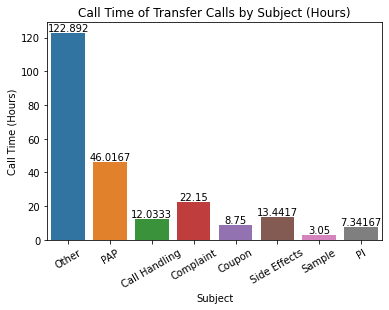

In [903]:
# Visualization of time of calls for transfer by subject
transfer_plot_time = sns.barplot(x = 'subject_cat',
            y = 'call_len_hours',
            #hue = 'call_len_hours',
            data = transfer2.head(20))

transfer_plot_time.set(xlabel='Subject', ylabel='Call Time (Hours)') # add x and y labels
transfer_plot_time.set(title='Call Time of Transfer Calls by Subject (Hours)') # add title
transfer_plot_time.set_xticklabels(transfer_plot_time.get_xticklabels(),rotation = 30)


for container in transfer_plot_time.containers:
    transfer_plot_time.bar_label(container)

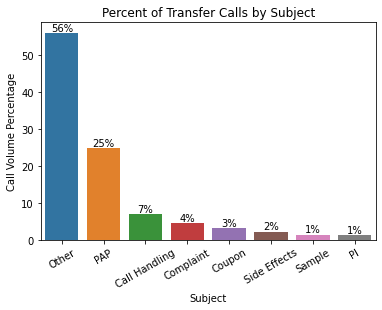

In [904]:
# Visualization of time of calls for transfer by subject
transfer_plot_percent = sns.barplot(x = 'subject_cat',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = transfer2.head(20))

transfer_plot_percent.set(xlabel='Subject', ylabel='Call Volume Percentage') # add x and y labels
transfer_plot_percent.set(title='Percent of Transfer Calls by Subject') # add title
transfer_plot_percent.set_xticklabels(transfer_plot_percent.get_xticklabels(),rotation = 30)

for container in transfer_plot_percent.containers:
    transfer_plot_percent.bar_label(container, fmt='%.f%%')

In [905]:
# group by subject and get unique counts of each subject, only transfer calls
nontransfer2 = nontransfer.groupby(['subject_cat']).agg({'call_id':'nunique', 'call_len_sec':'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# check new length
print(nontransfer.shape[0])

# create percentage of call volume column
nontransfer2['percent_of_calls'] = (nontransfer2['call_volume'] / nontransfer['call_id'].nunique()) * 100

# create percentage of call time column
nontransfer2['percent_of_time'] = (nontransfer2['call_len_sec'] / nontransfer['call_len_sec'].sum()) * 100

# create difference of %s column
nontransfer2['difference'] = nontransfer2['percent_of_calls']-nontransfer2['percent_of_time']

# create call length hours column
nontransfer2['call_len_hours'] = nontransfer2['call_len_sec']/3600

# create avg call length
nontransfer2['call_len_avg_min'] = nontransfer2['call_len_sec']/nontransfer2['call_volume']/60

#show
nontransfer2

1926


,subject_cat,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Other,999,493950,0.052452,51.869159,39.555556,12.313603,137.208333,8.240741
1,Complaint,268,273240,0.050373,13.914849,21.881081,-7.966232,75.900000,16.992537
2,Sample,215,116940,0.058605,11.163032,9.364565,1.798468,32.483333,9.065116
3,Side Effects,154,187620,0.036364,7.995846,15.024625,-7.028778,52.116667,20.305195
4,Coupon,128,65040,0.039844,6.645898,5.208408,1.437490,18.066667,8.468750
5,PI,101,88680,0.059406,5.244029,7.101502,-1.857472,24.633333,14.633663
6,PAP,53,20220,0.024528,2.751817,1.619219,1.132598,5.616667,6.358491
7,Call Handling,8,3060,0.037500,0.415369,0.245045,0.170324,0.850000,6.375000


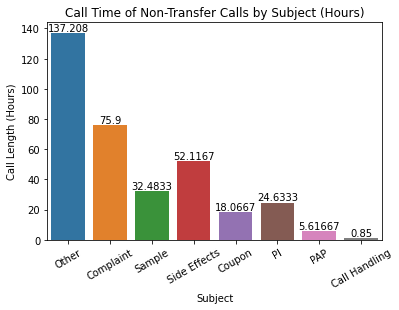

In [906]:
# Visualization of time of calls for nontranfer by subject
nontransfer_plot_time = sns.barplot(x = 'subject_cat',
            y = 'call_len_hours',
            #hue = 'call_len_hours',
            data = nontransfer2.head(20))

nontransfer_plot_time.set(xlabel='Subject', ylabel='Call Length (Hours)') # add x and y labels
nontransfer_plot_time.set(title='Call Time of Non-Transfer Calls by Subject (Hours)') # add title
nontransfer_plot_time.set_xticklabels(nontransfer_plot_time.get_xticklabels(),rotation = 30)

for container in nontransfer_plot_time.containers:
    nontransfer_plot_time.bar_label(container)

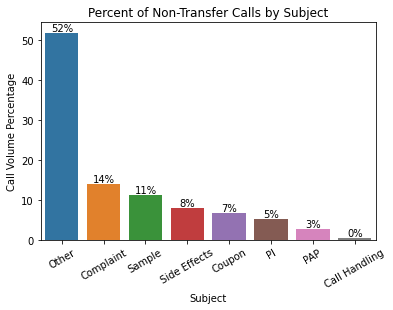

In [907]:
# Visualization of percent of calls for nontransfer by subject
nontransfer_plot_percent = sns.barplot(x = 'subject_cat',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = nontransfer2.head(20))

nontransfer_plot_percent.set(xlabel='Subject', ylabel='Call Volume Percentage') # add x and y labels
nontransfer_plot_percent.set(title='Percent of Non-Transfer Calls by Subject') # add title
nontransfer_plot_percent.set_xticklabels(nontransfer_plot_percent.get_xticklabels(),rotation = 30)

for container in nontransfer_plot_percent.containers:
    nontransfer_plot_percent.bar_label(container, fmt='%.f%%')

In [908]:
# group by contact_id, get call volume by contact id
contact_type = ts_md_sent.groupby('CONTACT_TYPE').agg({'call_id': 'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'PRODUCT_NAME': 'PRODUCT_NAME', 'call_id' : 'call_volume'})

# create percentage of call volume column
contact_type['percent_of_calls'] = (contact_type['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
contact_type['percent_of_time'] = (contact_type['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
contact_type['difference'] = contact_type['percent_of_calls']-contact_type['percent_of_time']

# create call length hours column
contact_type['call_len_hours'] = contact_type['call_len_sec']/3600

# create avg call length
contact_type['call_len_avg_min'] = contact_type['call_len_sec']//contact_type['call_volume']/60

#show
contact_type.head(20)

,CONTACT_TYPE,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,US Consumer,1904,1329090,0.056618,50.530786,63.375104,-12.844318,369.191667,11.633333
1,Patient,925,254100,0.066595,24.548832,12.116270,12.432562,70.583333,4.566667
2,US Professional,900,488460,0.065111,23.885350,23.291277,0.594073,135.683333,9.033333
3,US Internal Contact,33,23880,0.051515,0.875796,1.138672,-0.262876,6.633333,12.050000


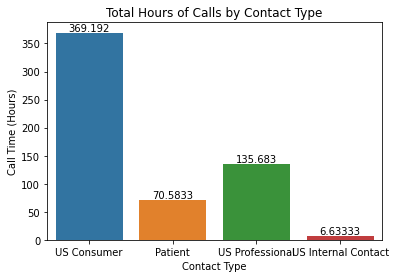

In [909]:
# Visualization of time of calls for brand by subject
contact_type_plot_time = sns.barplot(x = 'CONTACT_TYPE',
            y = 'call_len_hours',
            #hue = 'call_len_hours',
            data = contact_type.head(20))

contact_type_plot_time.set(xlabel='Contact Type', ylabel='Call Time (Hours)') # add x and y labels
contact_type_plot_time.set(title='Total Hours of Calls by Contact Type') # add title

for container in contact_type_plot_time.containers:
    contact_type_plot_time.bar_label(container)

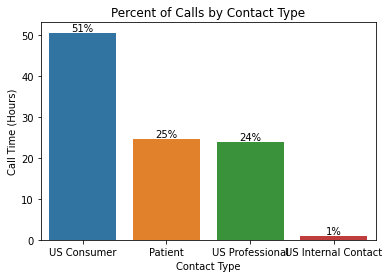

In [910]:
# Visualization of time of calls for brand by subject
contact_type_plot_percent = sns.barplot(x = 'CONTACT_TYPE',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = contact_type.head(20))

contact_type_plot_percent.set(xlabel='Contact Type', ylabel='Call Time (Hours)') # add x and y labels
contact_type_plot_percent.set(title='Percent of Calls by Contact Type') # add title

for container in contact_type_plot_percent.containers:
    contact_type_plot_percent.bar_label(container, fmt='%.f%%')

In [911]:
# group by subject, get call volume by subject
subject = ts_md_sent.groupby('subject_cat').agg({'call_id': 'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'PRODUCT_NAME': 'PRODUCT_NAME', 'call_id' : 'call_volume'})

# create percentage of call volume column
subject['percent_of_calls'] = (subject['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
subject['percent_of_time'] = (subject['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
subject['difference'] = subject['percent_of_calls']-subject['percent_of_time']

# create call length hours column
subject['call_len_hours'] = subject['call_len_sec']/3600

# create avg call length
subject['call_len_avg_min'] = subject['call_len_sec']/subject['call_volume']/60

#show
subject.head(20)

,subject_cat,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Other,2181,988680,0.065750,57.882166,47.143307,10.738859,274.633333,7.555250
1,PAP,510,185880,0.063922,13.535032,8.863331,4.671701,51.633333,6.074510
2,Complaint,332,347040,0.054217,8.811040,16.547936,-7.736895,96.400000,17.421687
3,Sample,241,127920,0.059751,6.395966,6.099619,0.296347,35.533333,8.846473
4,Side Effects,195,236010,0.040000,5.175159,11.253684,-6.078524,65.558333,20.171795
5,Coupon,186,96540,0.037097,4.936306,4.603324,0.332981,26.816667,8.650538
6,PI,123,115110,0.058537,3.264331,5.488799,-2.224468,31.975000,15.597561


In [912]:
# group by subject, get call volume by subject
subject = ts_md_sent.groupby('SUBJECT').agg({'call_id': 'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'PRODUCT_NAME': 'PRODUCT_NAME', 'call_id' : 'call_volume'})

# create percentage of call volume column
subject['percent_of_calls'] = (subject['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
subject['percent_of_time'] = (subject['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
subject['difference'] = subject['percent_of_calls']-subject['percent_of_time']

# create call length hours column
subject['call_len_hours'] = subject['call_len_sec']/3600

#show
#subject.head(20)

In [913]:
# group by case tier 1, get call volume by case tier 1
case1 = ts_md_sent.groupby('CASE_TIER_1_GLOBAL').agg({'call_id': 'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'PRODUCT_NAME': 'PRODUCT_NAME', 'call_id' : 'call_volume'})

# create percentage of call volume column
case1['percent_of_calls'] = (case1['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
case1['percent_of_time'] = (case1['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
case1['difference'] = case1['percent_of_calls']-case1['percent_of_time']

# create call length hours column
case1['call_len_hours'] = case1['call_len_sec']/3600

# create avg call length
case1['call_len_avg_min'] = case1['call_len_sec']/case1['call_volume']/60

#create % of tranfer calls
#case1['transfer %'] = ts_md_sent['transfer2']

#show
case1.head(20)

,CASE_TIER_1_GLOBAL,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,General Enquiry,2395,1109160,0.063967,63.561571,52.888164,10.673407,308.100000,7.718580
1,Product Quality Complaints,349,397320,0.055587,9.262208,18.945441,-9.683233,110.366667,18.974212
2,Fulfillment,337,192030,0.065282,8.943737,9.156582,-0.212845,53.341667,9.497033
3,Patient Access Programs,325,129720,0.067692,8.625265,6.185449,2.439816,36.033333,6.652308
4,Commercial Activities,219,117960,0.036073,5.812102,5.624696,0.187406,32.766667,8.977169
5,Adverse Event,125,135810,0.036800,3.317410,6.475839,-3.158429,37.725000,18.108000
6,Customer Feedback,15,13620,0.066667,0.398089,0.649444,-0.251354,3.783333,15.133333
7,Clinical Study (PMS),3,1560,0.066667,0.079618,0.074386,0.005232,0.433333,8.666667


In [914]:
prod_complaint=ts_md_sent[ts_md_sent["CASE_TIER_1_GLOBAL"].astype(str).str.contains("Complaint")]

# check new length 
print(prod_complaint.shape[0])

# group by subject and get unique counts of each subject
prod_complaint2 = prod_complaint.groupby(['SUBJECT']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
prod_complaint2['percent_of_calls'] = (prod_complaint2['call_volume'] / prod_complaint['call_id'].nunique()) * 100

# create percentage of call time column
prod_complaint2['percent_of_time'] = (prod_complaint2['call_len_sec'] / prod_complaint['call_len_sec'].sum()) * 100

# create difference of %s column
prod_complaint2['difference'] = prod_complaint2['percent_of_calls']-prod_complaint2['percent_of_time']

# create call length hours column
prod_complaint2['call_len_hours'] = prod_complaint2['call_len_sec']/3600

# create avg call length
prod_complaint2['call_len_avg_min'] = prod_complaint2['call_len_sec']/prod_complaint2['call_volume']/60

#show
prod_complaint2

349


,SUBJECT,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,PQC reported.,22,26460,0.018182,6.303725,6.659619,-0.355895,7.350000,20.045455
1,PQC,14,16800,0.028571,4.011461,4.228330,-0.216868,4.666667,20.000000
2,Rule out PQC,13,23700,0.038462,3.724928,5.964965,-2.240037,6.583333,30.384615
3,PQC follow up,12,4860,0.075000,3.438395,1.223195,2.215200,1.350000,6.750000
4,Ventolin HFA PQC rule out,6,8700,0.016667,1.719198,2.189671,-0.470473,2.416667,24.166667
5,PQC Trelegy,5,4140,0.080000,1.432665,1.041981,0.390683,1.150000,13.800000
6,Ventolin HFA PQC R/O,5,6240,0.060000,1.432665,1.570523,-0.137858,1.733333,20.800000
7,Flovent HFA PQC R/O,4,3330,0.025000,1.146132,0.838115,0.308016,0.925000,13.875000
8,PQC Follow up,4,1800,0.125000,1.146132,0.453035,0.693096,0.500000,7.500000
9,TRELEGY PQC,3,2490,0.033333,0.859599,0.626699,0.232900,0.691667,13.833333


In [915]:
# group by case tier 2, get call volume by case tier 2
case2 = ts_md_sent.groupby('CASE_TIER_2_US').agg({'call_id': 'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'PRODUCT_NAME': 'PRODUCT_NAME', 'call_id' : 'call_volume'})

# create percentage of call volume column
case2['percent_of_calls'] = (case2['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
case2['percent_of_time'] = (case2['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
case2['difference'] = case2['percent_of_calls']-case2['percent_of_time']

# create call length hours column
case2['call_len_hours'] = case2['call_len_sec']/3600

# create avg call length
case2['call_len_avg_min'] = case2['call_len_sec']/case2['call_volume']/60

#show
case2.head(20)

,CASE_TIER_2_US,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,GRC Transfer,1306,424290,0.078331,34.660297,20.231454,14.428844,117.858333,5.414625
1,GRC - Product Information,642,540600,0.049065,17.038217,25.777473,-8.739256,150.166667,14.034268
2,Patient Assistance,311,121710,0.066559,8.253715,5.803508,2.450208,33.808333,6.522508
3,Samples,286,164340,0.057692,7.590234,7.836237,-0.246004,45.650000,9.576923
4,Coupon,158,77220,0.034177,4.193206,3.682087,0.511119,21.450000,8.145570
5,GRC-Gateway Transfer,140,57390,0.085714,3.715499,2.736532,0.978967,15.941667,6.832143
6,AE Initial,125,135810,0.036800,3.317410,6.475839,-3.158429,37.725000,18.108000
7,PQC completed,120,144690,0.050000,3.184713,6.899265,-3.714551,40.191667,20.095833
8,Reason Not Found,106,32370,0.023585,2.813163,1.543501,1.269662,8.991667,5.089623
9,Education–no PQC or REPL,85,98910,0.049412,2.255839,4.716333,-2.460495,27.475000,19.394118


In [916]:
# group by case tier 3, get call volume by case tier 3
case3 = ts_md_sent.groupby('CASE_TIER_3_US').agg({'call_id': 'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'PRODUCT_NAME': 'PRODUCT_NAME', 'call_id' : 'call_volume'})

# create percentage of call volume column
case3['percent_of_calls'] = (case3['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
case3['percent_of_time'] = (case3['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
case3['difference'] = case3['percent_of_calls']-case3['percent_of_time']

# create call length hours column
case3['call_len_hours'] = case3['call_len_sec']/3600

# create avg call length
case3['call_len_avg_min'] = case3['call_len_sec']/case3['call_volume']/60

#show
case3.head(20)

,CASE_TIER_3_US,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,GSK Patient Assistance Program,285,112200,0.065263,7.563694,5.350041,2.213653,31.166667,6.561404
1,GRC Product Team,276,93300,0.064855,7.324841,4.448831,2.876009,25.916667,5.634058
2,Patient Assistance Program,220,75300,0.065909,5.838641,3.590536,2.248105,20.916667,5.704545
3,GSK RC samples,204,108780,0.061275,5.414013,5.186965,0.227047,30.216667,8.887255
4,Medical Information(GRC),175,52170,0.093143,4.644374,2.487626,2.156747,14.491667,4.968571
5,Other Information,161,107370,0.037888,4.272824,5.119732,-0.846908,29.825000,11.114907
6,Replaced by SC,145,184410,0.041379,3.848195,8.793237,-4.945041,51.225000,21.196552
7,Consumer Healthcare,140,44790,0.081429,3.715499,2.135725,1.579774,12.441667,5.332143
8,Overview/How Obtained,100,49170,0.041000,2.653928,2.344577,0.309351,13.658333,8.195000
9,GSK Employee,99,20010,0.101010,2.627389,0.954138,1.673250,5.558333,3.368687


In [917]:
# create df grouped by ivr reason, counts number of calls for each ivr reason
ivr = ts_md_sent.groupby('IVR_REASON').agg({'call_id': 'nunique', 'call_len_sec':'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})

# create percentage of call volume column
ivr['percent_of_calls'] = (ivr['call_volume'] / ts_md_sent['call_id'].nunique()) * 100

# create percentage of call time column
ivr['percent_of_time'] = (ivr['call_len_sec'] / ts_md_sent['call_len_sec'].sum()) * 100

# create difference of %s column
ivr['difference'] = ivr['percent_of_calls']-ivr['percent_of_time']

# create call length hours column
ivr['call_len_hours'] = ivr['call_len_sec']/3600

# create avg call length
ivr['call_len_avg_min'] = ivr['call_len_sec']/ivr['call_volume']/60

# show
ivr.head(30)

,IVR_REASON,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Patient Other Options,370,173370,0.056757,9.819533,8.266815,1.552717,48.158333,7.809459
1,GSK Source,354,157050,0.063559,9.394904,7.488628,1.906277,43.625000,7.394068
2,Patient Other Med Qs,267,182760,0.057303,7.085987,8.714560,-1.628572,50.766667,11.408240
3,Quality Complaint,236,201090,0.051271,6.263270,9.588590,-3.325321,55.858333,14.201271
4,Nucala Inbound Call,201,113280,0.080100,5.334395,5.401539,-0.067144,31.466667,9.393035
5,Benlysta Promotional LASH Transfer,169,130650,0.084615,4.485138,6.229794,-1.744656,36.291667,12.884615
6,Coupon Max Errors,144,109170,0.051389,3.821656,5.205562,-1.383906,30.325000,12.635417
7,PAP Agent Request,123,47670,0.055285,3.264331,2.273052,0.991279,13.241667,6.459350
8,Back Off Menu Zero Out,122,32580,0.095902,3.237792,1.553515,1.684277,9.050000,4.450820
9,Role Menu Max Errors,110,42420,0.065455,2.919321,2.022716,0.896604,11.783333,6.427273


In [918]:
# create df of only hcp calls
hcp=ts_md_sent[ts_md_sent.CONTACT_TYPE=="US Professional"]

# check new length 
print(hcp.shape[0])

# group by subject and get unique counts of each subject
hcp2 = hcp.groupby(['CASE_TIER_1_GLOBAL']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
hcp2['percent_of_calls'] = (hcp2['call_volume'] / hcp['call_id'].nunique()) * 100

# create percentage of call time column
hcp2['percent_of_time'] = (hcp2['call_len_sec'] / hcp['call_len_sec'].sum()) * 100

# create difference of %s column
hcp2['difference'] = hcp2['percent_of_calls']-hcp2['percent_of_time']

# create call length hours column
hcp2['call_len_hours'] = hcp2['call_len_sec']/3600

# create avg call length
hcp2['call_len_avg_min'] = hcp2['call_len_sec']/hcp2['call_volume']/60

#show
hcp2

900


,CASE_TIER_1_GLOBAL,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,General Enquiry,400,156510,0.071750,44.444444,32.041518,12.402926,43.475000,6.521250
1,Fulfillment,299,169170,0.062207,33.222222,34.633337,-1.411115,46.991667,9.429766
2,Product Quality Complaints,111,100860,0.065766,12.333333,20.648569,-8.315236,28.016667,15.144144
3,Commercial Activities,43,27060,0.025581,4.777778,5.539860,-0.762082,7.516667,10.488372
4,Adverse Event,35,29310,0.051429,3.888889,6.000491,-2.111602,8.141667,13.957143
5,Patient Access Programs,11,4740,0.090909,1.222222,0.970397,0.251825,1.316667,7.181818
6,Clinical Study (PMS),1,810,0.100000,0.111111,0.165827,-0.054716,0.225000,13.500000


In [919]:
hcp['subject_cat']="Other"
hcp.loc[hcp['CASE_TIER_2_US'].str.contains('transfer', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "Transfer"
hcp.loc[hcp['CASE_TIER_2_US'].str.contains('sample|samples', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "Samples"
hcp.loc[hcp['CASE_TIER_2_US'].str.contains('product information|pi', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "PI"
hcp.loc[hcp['CASE_TIER_2_US'].str.contains('pqc', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "Complaint"




# group by subject and get unique counts of each subject
hcp3 = hcp.groupby(['subject_cat']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
hcp3['percent_of_calls'] = (hcp3['call_volume'] / hcp['call_id'].nunique()) * 100

# create percentage of call time column
hcp3['percent_of_time'] = (hcp3['call_len_sec'] / hcp['call_len_sec'].sum()) * 100

# create difference of %s column
hcp3['difference'] = hcp3['percent_of_calls']-hcp3['percent_of_time']

# create call length hours column
hcp3['call_len_hours'] = hcp3['call_len_sec']/3600

# create avg call length
hcp3['call_len_avg_min'] = hcp3['call_len_sec']/hcp3['call_volume']/60

#show
hcp3

<ipython-input-919-0ab6f387883d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcp['subject_cat']="Other"
/Users/braden.little/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,subject_cat,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Transfer,328,111720,0.075915,36.444444,22.871883,13.572561,31.033333,5.676829
1,Samples,270,154230,0.057407,30.000000,31.574745,-1.574745,42.841667,9.520370
2,Other,157,96930,0.065605,17.444444,19.844000,-2.399555,26.925000,10.289809
3,PI,73,45000,0.058904,8.111111,9.212627,-1.101516,12.500000,10.273973
4,Complaint,72,80580,0.050000,8.000000,16.496745,-8.496745,22.383333,18.652778


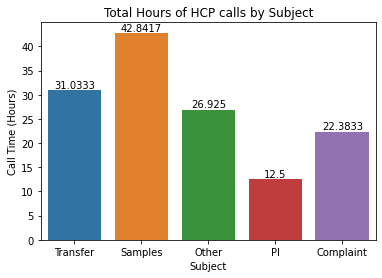

In [920]:
# Visualization of time of calls for brand by subject
hcp_plot_time = sns.barplot(x = 'subject_cat',
            y = 'call_len_hours',
            #hue = 'call_len_hours',
            data = hcp3.head(20))

hcp_plot_time.set(xlabel='Subject', ylabel='Call Time (Hours)') # add x and y labels
hcp_plot_time.set(title='Total Hours of HCP calls by Subject') # add title

for container in hcp_plot_time.containers:
    hcp_plot_time.bar_label(container)

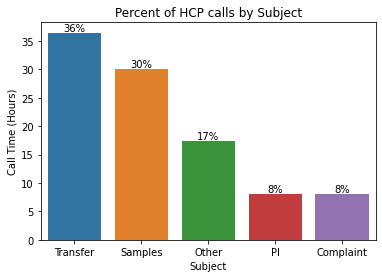

In [921]:
# Visualization of time of calls for brand by subject
hcp_plot_percent = sns.barplot(x = 'subject_cat',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = hcp3.head(20))

hcp_plot_percent.set(xlabel='Subject', ylabel='Call Time (Hours)') # add x and y labels
hcp_plot_percent.set(title='Percent of HCP calls by Subject') # add title

for container in hcp_plot_percent.containers:
    hcp_plot_percent.bar_label(container, fmt='%.f%%')

In [922]:
ts_md_sent['product_info_cat']="Other"
ts_md_sent.loc[ts_md_sent['CASE_TIER_3_US'].str.contains('PI', na=False, regex=True), "product_info_cat"] = "PI"

In [923]:
# create df of only product info case2
product_info=ts_md_sent[ts_md_sent.CASE_TIER_2_US == "GRC - Product Information"]

# check new length 
print(product_info.shape[0])

# group by subject and get unique counts of each subject
product_info2 = product_info.groupby(['CASE_TIER_3_US']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
product_info2['percent_of_calls'] = (product_info2['call_volume'] / product_info['call_id'].nunique()) * 100

# create percentage of call time column
product_info2['percent_of_time'] = (product_info2['call_len_sec'] / product_info['call_len_sec'].sum()) * 100

# create difference of %s column
product_info2['difference'] = product_info2['percent_of_calls']-product_info2['percent_of_time']

# create call length hours column
product_info2['call_len_hours'] = product_info2['call_len_sec']/3600

# create avg call length
product_info2['call_len_avg_min'] = product_info2['call_len_sec']/product_info2['call_volume']/60

#show
product_info2

642


,CASE_TIER_3_US,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,Other Information,160,106830,0.037500,24.922118,19.761376,5.160742,29.675000,11.128125
1,PI-Dosing and Administration,87,77220,0.052874,13.551402,14.284129,-0.732727,21.450000,14.793103
2,PI-Other Questions,61,64740,0.047541,9.501558,11.975583,-2.474025,17.983333,17.688525
3,Product/Device Education,53,52560,0.054717,8.255452,9.722531,-1.467079,14.600000,16.528302
4,Availability,39,24390,0.046154,6.074766,4.511654,1.563113,6.775000,10.423077
5,PI-Adverse Reactions,38,44010,0.036842,5.919003,8.140954,-2.221951,12.225000,19.302632
6,PI-Description,27,23130,0.051852,4.205607,4.278579,-0.072972,6.425000,14.277778
7,PI-How Supplied/Storage,22,15660,0.068182,3.426791,2.896781,0.530010,4.350000,11.863636
8,Ellipta Blister Dose,20,13110,0.055000,3.115265,2.425083,0.690182,3.641667,10.925000
9,Courtesy Replacement,20,20220,0.045000,3.115265,3.740289,-0.625024,5.616667,16.850000


In [924]:
# create df of only quality complaints ivr reason
complaint=ts_md_sent[ts_md_sent.CASE_TIER_1_GLOBAL == "Product Quality Complaints"]

# check new length 
print(complaint.shape[0])

# group by subject and get unique counts of each subject
complaint2 = complaint.groupby(['CONTACT_TYPE']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
complaint2['percent_of_calls'] = (complaint2['call_volume'] / complaint['call_id'].nunique()) * 100

# create percentage of call time column
complaint2['percent_of_time'] = (complaint2['call_len_sec'] / complaint['call_len_sec'].sum()) * 100

# create difference of %s column
complaint2['difference'] = complaint2['percent_of_calls']-complaint2['percent_of_time']

# create call length hours column
complaint2['call_len_hours'] = complaint2['call_len_sec']/3600

# create avg call length
complaint2['call_len_avg_min'] = complaint2['call_len_sec']/complaint2['call_volume']/60

#show
complaint2

349


,CONTACT_TYPE,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,US Consumer,235,293760,0.050638,67.335244,73.935367,-6.600123,81.600000,20.834043
1,US Professional,111,100860,0.065766,31.805158,25.385080,6.420078,28.016667,15.144144
2,US Internal Contact,3,2700,0.066667,0.859599,0.679553,0.180046,0.750000,15.000000


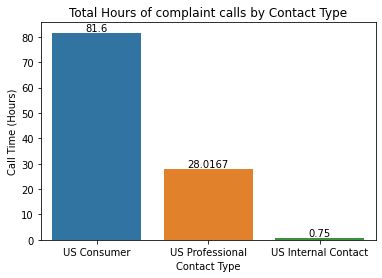

In [925]:
# Visualization of time of complaint calls by contact type
hcp_complaint_plot_time = sns.barplot(x = 'CONTACT_TYPE',
            y = 'call_len_hours',
            #hue = 'call_len_hours',
            data = complaint2.head(20))

hcp_complaint_plot_time.set(xlabel='Contact Type', ylabel='Call Time (Hours)') # add x and y labels
hcp_complaint_plot_time.set(title='Total Hours of complaint calls by Contact Type') # add title

for container in hcp_complaint_plot_time.containers:
    hcp_complaint_plot_time.bar_label(container)

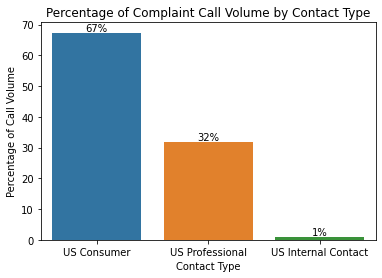

In [926]:
# Visualization of time of complaint calls by contact type
hcp_complaint_plot_percent = sns.barplot(x = 'CONTACT_TYPE',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = complaint2.head(20))

hcp_complaint_plot_percent.set(xlabel='Contact Type', ylabel='Percentage of Call Volume') # add x and y labels
hcp_complaint_plot_percent.set(title='Percentage of Complaint Call Volume by Contact Type') # add title

for container in hcp_complaint_plot_percent.containers:
    hcp_complaint_plot_percent.bar_label(container, fmt= '%.f%%')

In [927]:
# create df of only quality complaints ivr reason
GSK_Source=ts_md_sent[ts_md_sent.IVR_REASON == "GSK Source"]

# check new length 
print(GSK_Source.shape[0])

# group by subject and get unique counts of each subject
GSK_Source2 = GSK_Source.groupby(['CASE_TIER_3_US']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
GSK_Source2['percent_of_calls'] = (GSK_Source2['call_volume'] / GSK_Source['call_id'].nunique()) * 100

# create percentage of call time column
GSK_Source2['percent_of_time'] = (GSK_Source2['call_len_sec'] / GSK_Source['call_len_sec'].sum()) * 100

# create difference of %s column
GSK_Source2['difference'] = GSK_Source2['percent_of_calls']-GSK_Source2['percent_of_time']

# create call length hours column
GSK_Source2['call_len_hours'] = GSK_Source2['call_len_sec']/3600

# create avg call length
GSK_Source2['call_len_avg_min'] = GSK_Source2['call_len_sec']/GSK_Source2['call_volume']/60

#show
GSK_Source2

354


,CASE_TIER_3_US,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,GSK RC samples,98,54960,0.055102,27.683616,34.995224,-7.311609,15.266667,9.346939
1,Consumer Healthcare,37,10020,0.081081,10.451977,6.380134,4.071844,2.783333,4.513514
2,Medical Information(GRC),31,9210,0.112903,8.757062,5.864374,2.892688,2.558333,4.951613
3,GSK Patient Assistance Program,31,13380,0.070968,8.757062,8.519580,0.237482,3.716667,7.193548
4,Patient Assistance Program,17,5760,0.088235,4.802260,3.667622,1.134638,1.600000,5.647059
5,Overview/How Obtained,16,7560,0.031250,4.519774,4.813754,-0.293980,2.100000,7.875000
6,eSampling Address Issue,11,4920,0.036364,3.107345,3.132760,-0.025416,1.366667,7.454545
7,eSampling Other,10,6960,0.020000,2.824859,4.431710,-1.606851,1.933333,11.600000
8,Sample Followup,9,6900,0.033333,2.542373,4.393505,-1.851132,1.916667,12.777778
9,GRC Product Team,9,2820,0.100000,2.542373,1.795606,0.746766,0.783333,5.222222


In [928]:
# create df of only hcp calls
pap=ts_md_sent[ts_md_sent.subject_cat=="PAP"]

pap.loc[pap['transcript'].str.contains('transfer', na=False, flags=re.IGNORECASE, regex=True), "transfer2"] = "True"
pap.loc[~pap['transcript'].str.contains('transfer', na=False, flags=re.IGNORECASE, regex=True), "transfer2"] = "False"


#ts_md_sent.loc[ts_md_sent['SUBJECT'].str.contains('PAP|Patient Assistance Program', na=False, flags=re.IGNORECASE, regex=True), "subject_cat"] = "PAP"


# check new length 
print(pap.shape[0])

# group by subject and get unique counts of each subject
pap2 = pap.groupby(['transfer2']).agg({'call_id':'nunique', 'call_len_sec': 'sum', 'score':'mean'}).sort_values('call_id',ascending=False).reset_index().\
                                rename(columns = {'call_id' : 'call_volume'})[:25]

# create percentage of call volume column
pap2['percent_of_calls'] = (pap2['call_volume'] / pap['call_id'].nunique()) * 100

# create percentage of call time column
pap2['percent_of_time'] = (pap2['call_len_sec'] / pap['call_len_sec'].sum()) * 100

# create difference of %s column
pap2['difference'] = pap2['percent_of_calls']-pap2['percent_of_time']

# create call length hours column
pap2['call_len_hours'] = pap2['call_len_sec']/3600

# create avg call length
pap2['call_len_avg_min'] = pap2['call_len_sec']/pap2['call_volume']/60

#show
pap2

510


/Users/braden.little/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,transfer2,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,True,457,165660,0.068490,89.607843,89.122014,0.485829,46.016667,6.041575
1,False,53,20220,0.024528,10.392157,10.877986,-0.485829,5.616667,6.358491


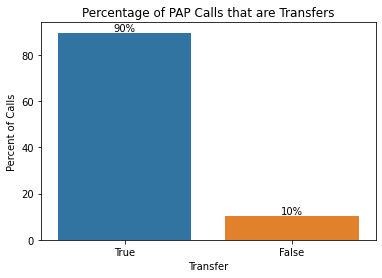

In [929]:
# Visualization of time of calls for brand by subject
pap_plot_transfer = sns.barplot(x = 'transfer2',
            y = 'percent_of_calls',
            #hue = 'call_len_hours',
            data = pap2.head(20))

pap_plot_transfer.set(xlabel='Transfer', ylabel='Percent of Calls') # add x and y labels
pap_plot_transfer.set(title='Percentage of PAP Calls that are Transfers') # add title

for container in pap_plot_transfer.containers:
    pap_plot_transfer.bar_label(container, fmt= '%.f%%')

In [930]:
ts_md_sent.head(20)

,call_id,magnitude,score,sentences,magn_cat,sent_cat,sent_type,call_len_sec,transcript,OWNER_NAME_CURRENT,...,md_desc,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min,subject_cat,transfer2,voicemail,product_info_cat
0,200104928812,13.1,0.1,[{'text': {'content': 'Thank you for calling t...,l,n,neutral,240,Thank you for calling the GSK response center ...,Karl Brown,...,Sample Fulfillment. Requesting samples.,5.310640e+09,0.011444,5.310640e+09,0.066667,1.998951e-11,Sample,False,NaN,Other
1,224537826923,68.4,0.1,[{'text': {'content': 'Thank you for calling t...,h,n,very mixed,960,Thank you for calling the response center . My...,Marilynn Adams,...,PQC Ruled out/Courtesy Replacment. Pharmacist ...,5.959072e+09,0.045776,5.959072e+09,0.266667,7.125748e-11,Complaint,False,NaN,Other
2,200036105174,13.6,0.1,[{'text': {'content': 'Thank you for calling t...,l,n,neutral,210,Thank you for calling the response Center . My...,Jessica Harris,...,MI Transfer. Temperature excursion; Transferre...,5.308814e+09,0.010013,5.308814e+09,0.058333,1.749684e-11,Other,True,NaN,Other
3,200035905791,11.7,0.2,[{'text': {'content': 'Thank you for calling t...,l,+,maybe positive,240,Thank you for calling the response center . My...,Shanta Dunn,...,MI Transfer. Temp Excursion,5.308809e+09,0.011444,5.308809e+09,0.066667,1.999641e-11,Other,True,NaN,Other
4,200104595841,10.9,0.2,[{'text': {'content': 'Thank you for calling t...,l,+,maybe positive,180,Thank you for calling the response center . My...,Shanta Dunn,...,VSC Transfer. VSC Transfer,5.310632e+09,0.008583,5.310632e+09,0.050000,1.499216e-11,Other,True,NaN,Other
5,200036026126,27.4,0.1,[{'text': {'content': 'Thank you for calling n...,m,n,mixed,480,"Thank you for calling no response , sir . My n...",Vernessa Selvy,...,PAP. Caller wanted to know how program works.\...,5.308812e+09,0.022888,5.308812e+09,0.133333,3.999280e-11,PAP,True,NaN,Other
6,224408186635,87.0,0.0,[{'text': {'content': 'Thank you for calling t...,h,n,very mixed,1650,Thank you for calling the response center . My...,Doris Green,...,Trelegy question. The patient reports she is a...,5.955631e+09,0.078677,5.955631e+09,0.458333,1.225445e-10,Other,True,NaN,PI
7,199532896244,27.6,0.1,[{'text': {'content': 'Thank you for calling t...,m,n,mixed,540,Thank you for calling the GISK response sooner...,Karl Brown,...,Product Pricing. Caller inquiring towards pric...,5.295459e+09,0.025749,5.295459e+09,0.150000,4.510534e-11,Other,False,NaN,Other
8,224334217871,19.4,0.0,"[{'text': {'content': '. .', 'beginOffset': 0}...",m,n,mixed,480,. . Thank you for calling the GSK response cen...,Laurie Varner,...,Transfer to Nucala Gateway. Caller needs assis...,5.953668e+09,0.022888,5.953668e+09,0.133333,3.566108e-11,Other,True,NaN,Other
9,200239706320,5.6,0.0,"[{'text': {'content': '.', 'beginOffset': 0}, ...",l,n,neutral,120,. Let's hope they just hung up on me . .. I d...,Audrey Thompson,...,NaN,5.314217e+09,0.005722,5.314217e+09,0.033333,9.988029e-12,Other,False,NaN,Other


In [931]:
contact_type

,CONTACT_TYPE,call_volume,call_len_sec,score,percent_of_calls,percent_of_time,difference,call_len_hours,call_len_avg_min
0,US Consumer,1904,1329090,0.056618,50.530786,63.375104,-12.844318,369.191667,11.633333
1,Patient,925,254100,0.066595,24.548832,12.116270,12.432562,70.583333,4.566667
2,US Professional,900,488460,0.065111,23.885350,23.291277,0.594073,135.683333,9.033333
3,US Internal Contact,33,23880,0.051515,0.875796,1.138672,-0.262876,6.633333,12.050000


In [942]:
consumer = ts_md_sent[ts_md_sent['CONTACT_TYPE']=='US Consumer']
patient = ts_md_sent[ts_md_sent['CONTACT_TYPE']=='Patient']
HCP = ts_md_sent[ts_md_sent['CONTACT_TYPE']=='US Professional']
internal = ts_md_sent[ts_md_sent['CONTACT_TYPE']=='US Internal Contact']

ttest_ind(consumer['call_len_sec'], HCP['call_len_sec'])
ttest_ind(patient['call_len_sec'], HCP['call_len_sec'])



Ttest_indResult(statistic=-16.715831225599192, pvalue=1.8055467114192418e-58)

In [945]:
from itertools import combinations
from scipy.stats import ttest_ind

grps = ts_md_sent['CONTACT_TYPE'].unique()
combs = combinations(grps, 2)

ttests = {
    f'{c1}_{c2}': ttest_ind(
        ts_md_sent.loc[ts_md_sent['CONTACT_TYPE'] == c1, 'call_len_sec'], 
        ts_md_sent.loc[ts_md_sent['CONTACT_TYPE'] == c2, 'call_len_sec']
    ) for c1, c2 in combs
}

ttests

{'US Professional_US Consumer': Ttest_indResult(statistic=-7.912617406779162, pvalue=3.596573873813593e-15),
 'US Professional_Patient': Ttest_indResult(statistic=16.715831225599192, pvalue=1.8055467114192418e-58),
 'US Professional_US Internal Contact': Ttest_indResult(statistic=-2.546996955886876, pvalue=0.011025344753588658),
 'US Professional_nan': Ttest_indResult(statistic=nan, pvalue=nan),
 'US Consumer_Patient': Ttest_indResult(statistic=22.99644839859388, pvalue=2.024160895133181e-107),
 'US Consumer_US Internal Contact': Ttest_indResult(statistic=-0.2778634150038547, pvalue=0.7811468938050576),
 'US Consumer_nan': Ttest_indResult(statistic=nan, pvalue=nan),
 'Patient_US Internal Contact': Ttest_indResult(statistic=-8.440546643569716, pvalue=1.1595826951435803e-16),
 'Patient_nan': Ttest_indResult(statistic=nan, pvalue=nan),
 'US Internal Contact_nan': Ttest_indResult(statistic=nan, pvalue=nan)}

In [ ]:
hhjk;